#                                    Micro Credit Defaulter Project

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Micro_Credit.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# DataAnalysing

In [4]:
df.shape
#Shape of the colummns.......

(209593, 37)

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [8]:
df.nunique()
#Unique values in each columns...

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [9]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
df=df.drop(columns='Unnamed: 0')
#Removing column unnamed since it is serial number...

In [11]:
df['pday'] = pd.DatetimeIndex(df['pdate']).day
df['pmonth'] = pd.DatetimeIndex(df['pdate']).month
df = df.drop(columns=['pdate','msisdn','pcircle'],axis = 1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [12]:
for i in df.columns:
    print('\n','__________________________________')
    print(df[i].value_counts())


 __________________________________
1    183431
0     26162
Name: label, dtype: int64

 __________________________________
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64

 __________________________________
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
36.098000          1
75.915000          1
9.516667           1
21078.677000       1
4489.362000        1
Name: daily_decr30, Length: 147025, dtype: int64

 __________________________________
0.000       4063
500.000      781
1000.000     490
700.000      343
600.000      316
            ... 
1282.220       1
1231.770       1
7385.270       1
91.425         1
4534.820       1
Name: daily_decr90, Length: 158669, dtype: int64

 _______________

# Skewness

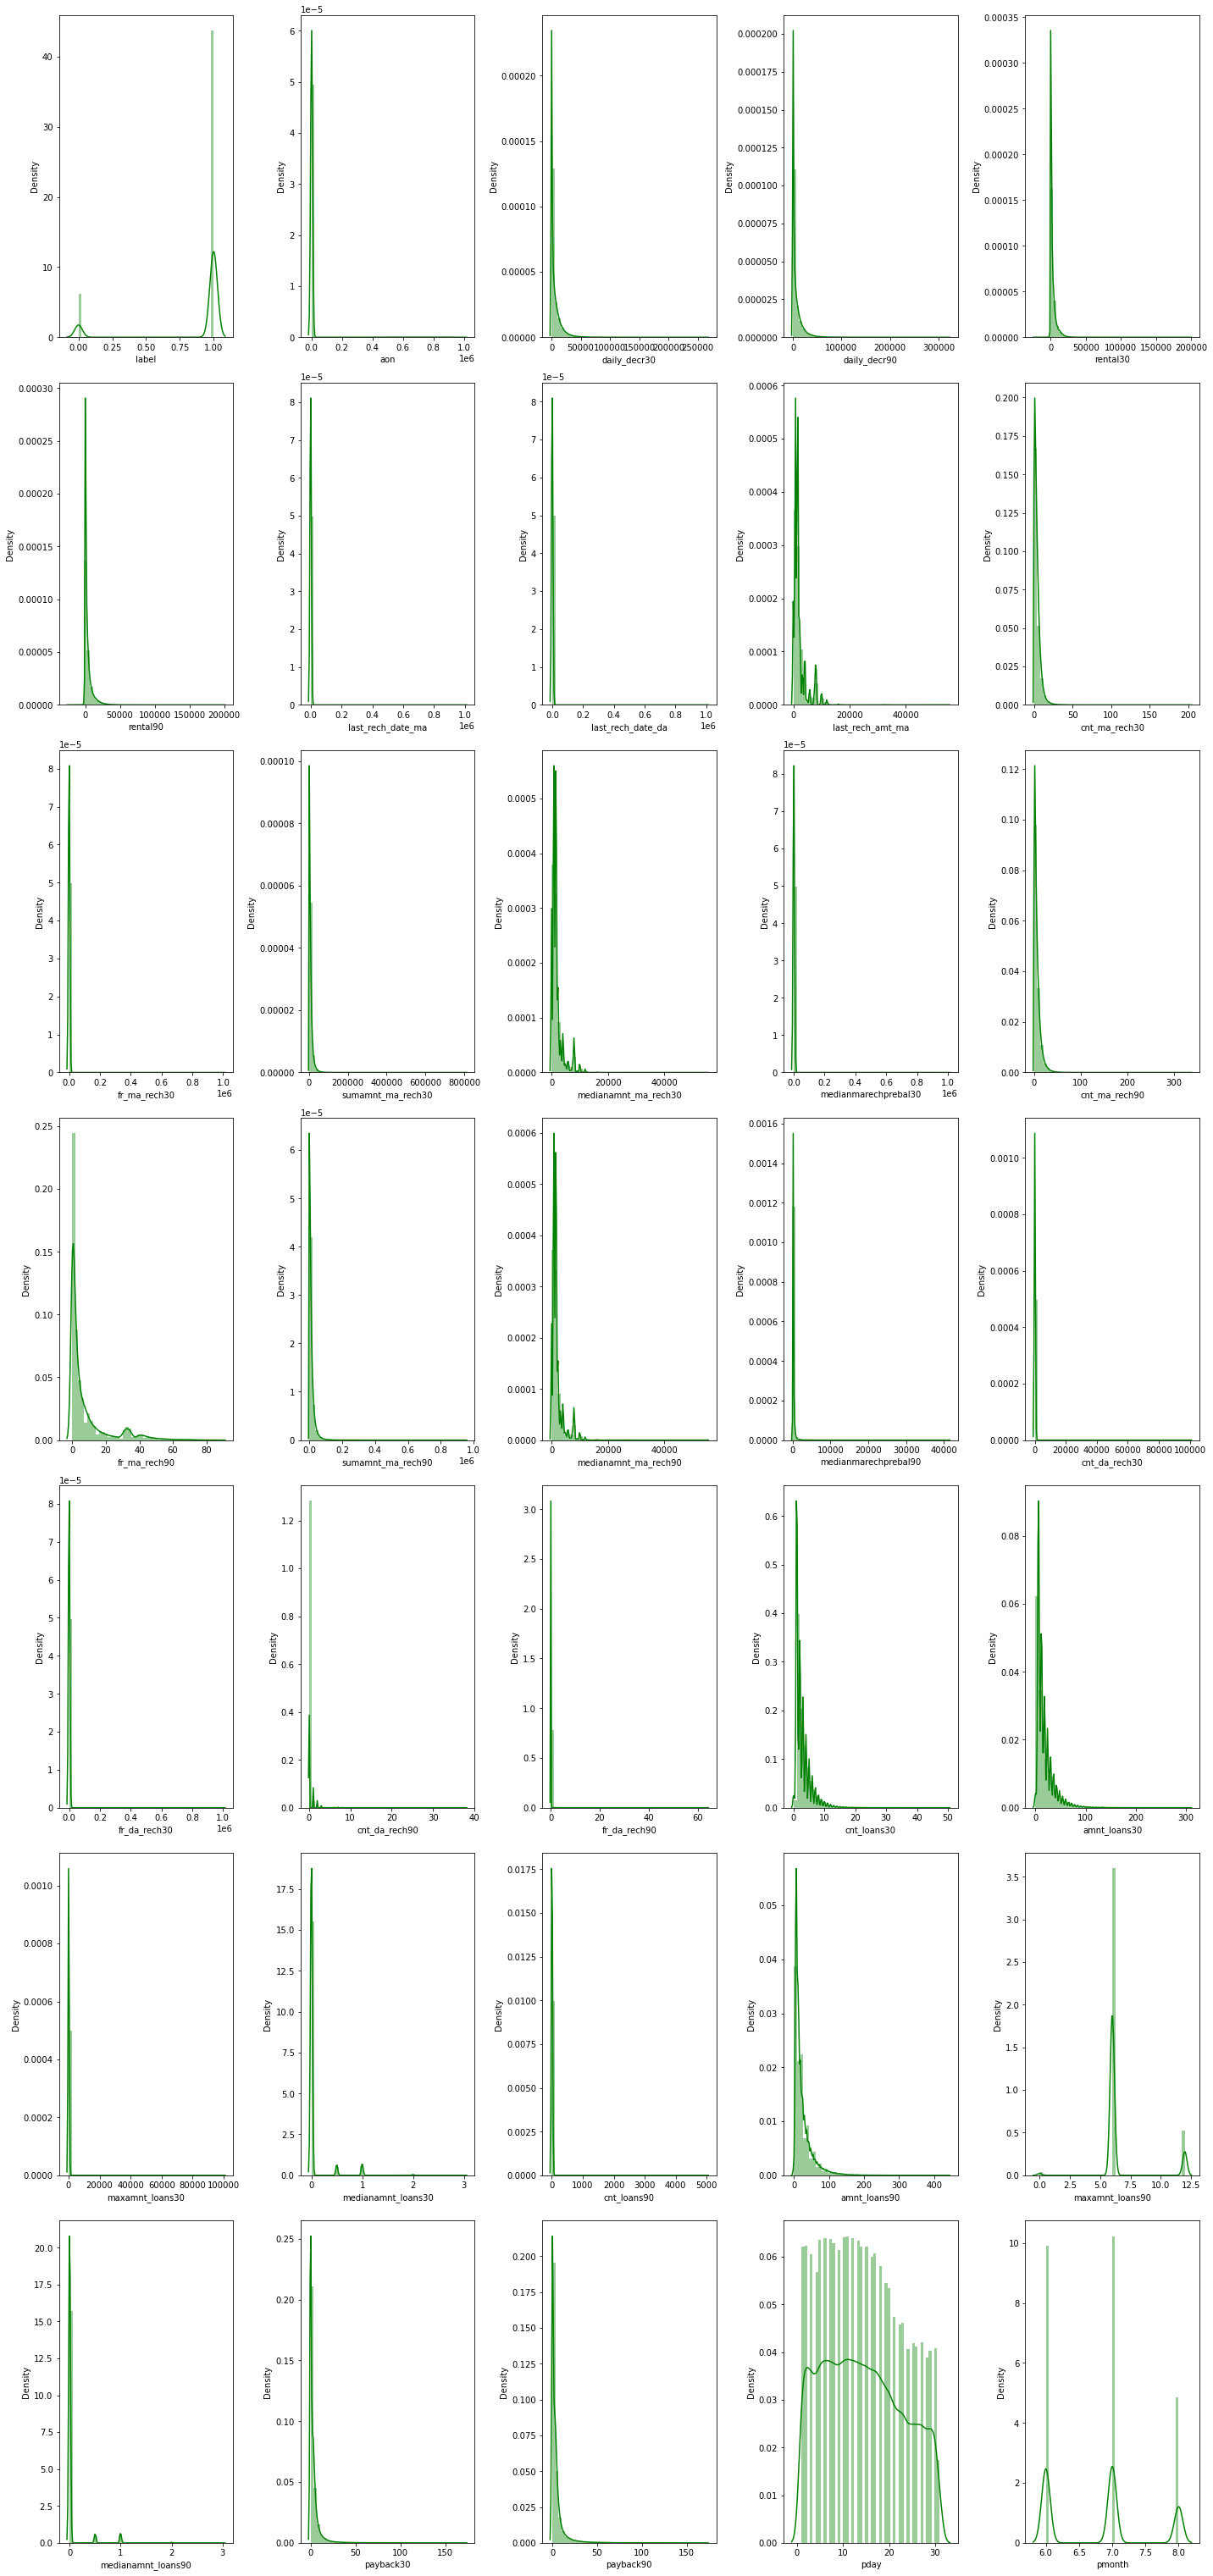

In [13]:
#checking the skewness of the data
plt.figure(figsize=(20,60))

for i, col in zip(range(len(df.columns)),df.columns):
    plt.subplot(10,5,i+1)
    sns.distplot(df[col], color='green')
    plt.tight_layout()

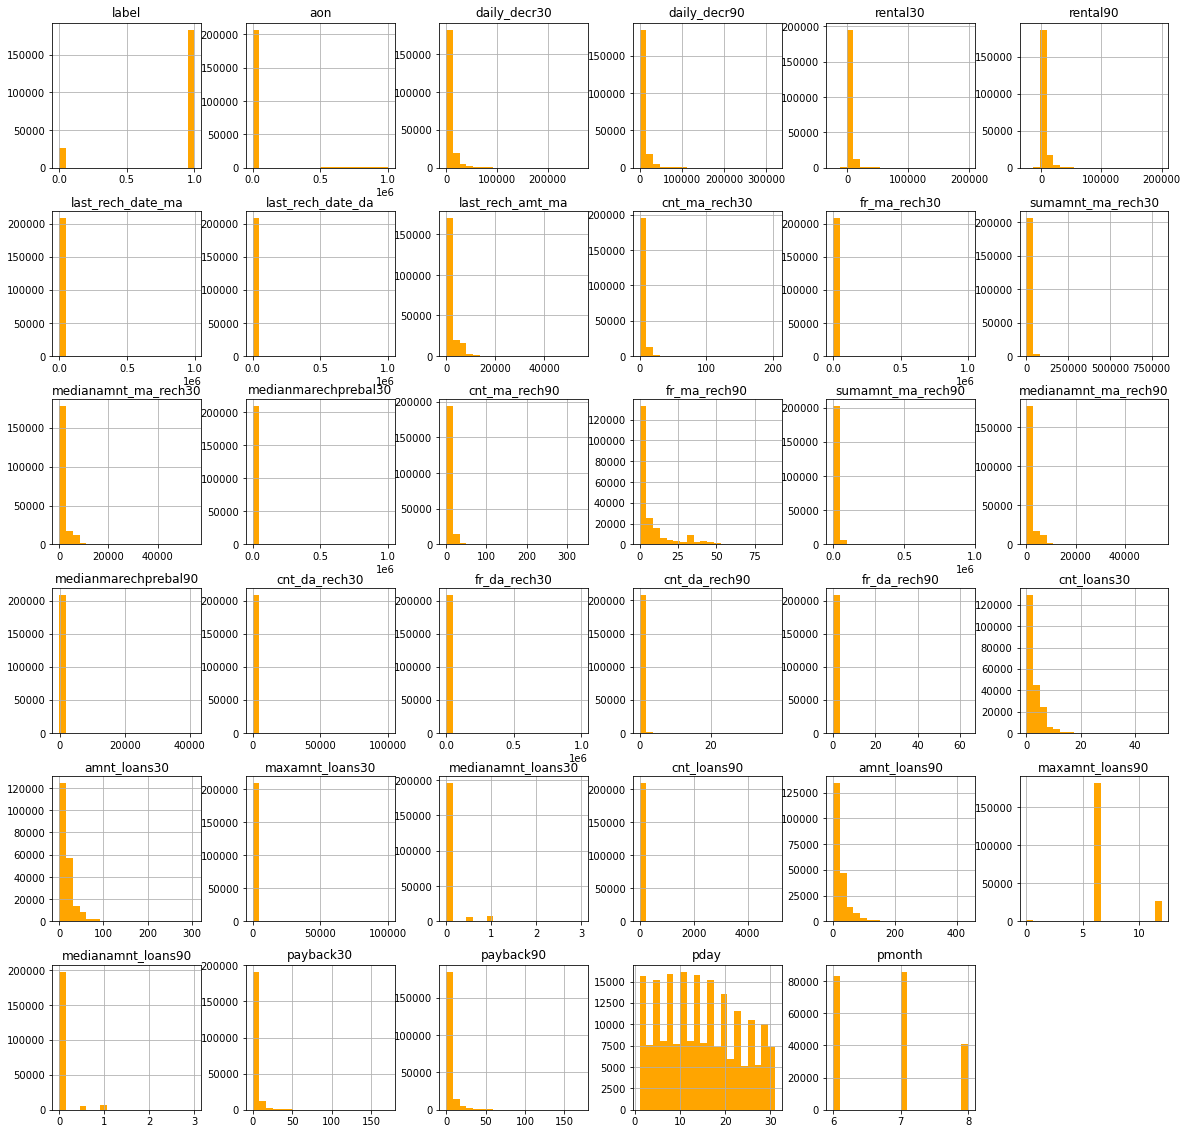

In [14]:
df.hist(bins = 20, figsize = (20,20), color = 'orange');

In [15]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

<function matplotlib.pyplot.show(close=None, block=None)>

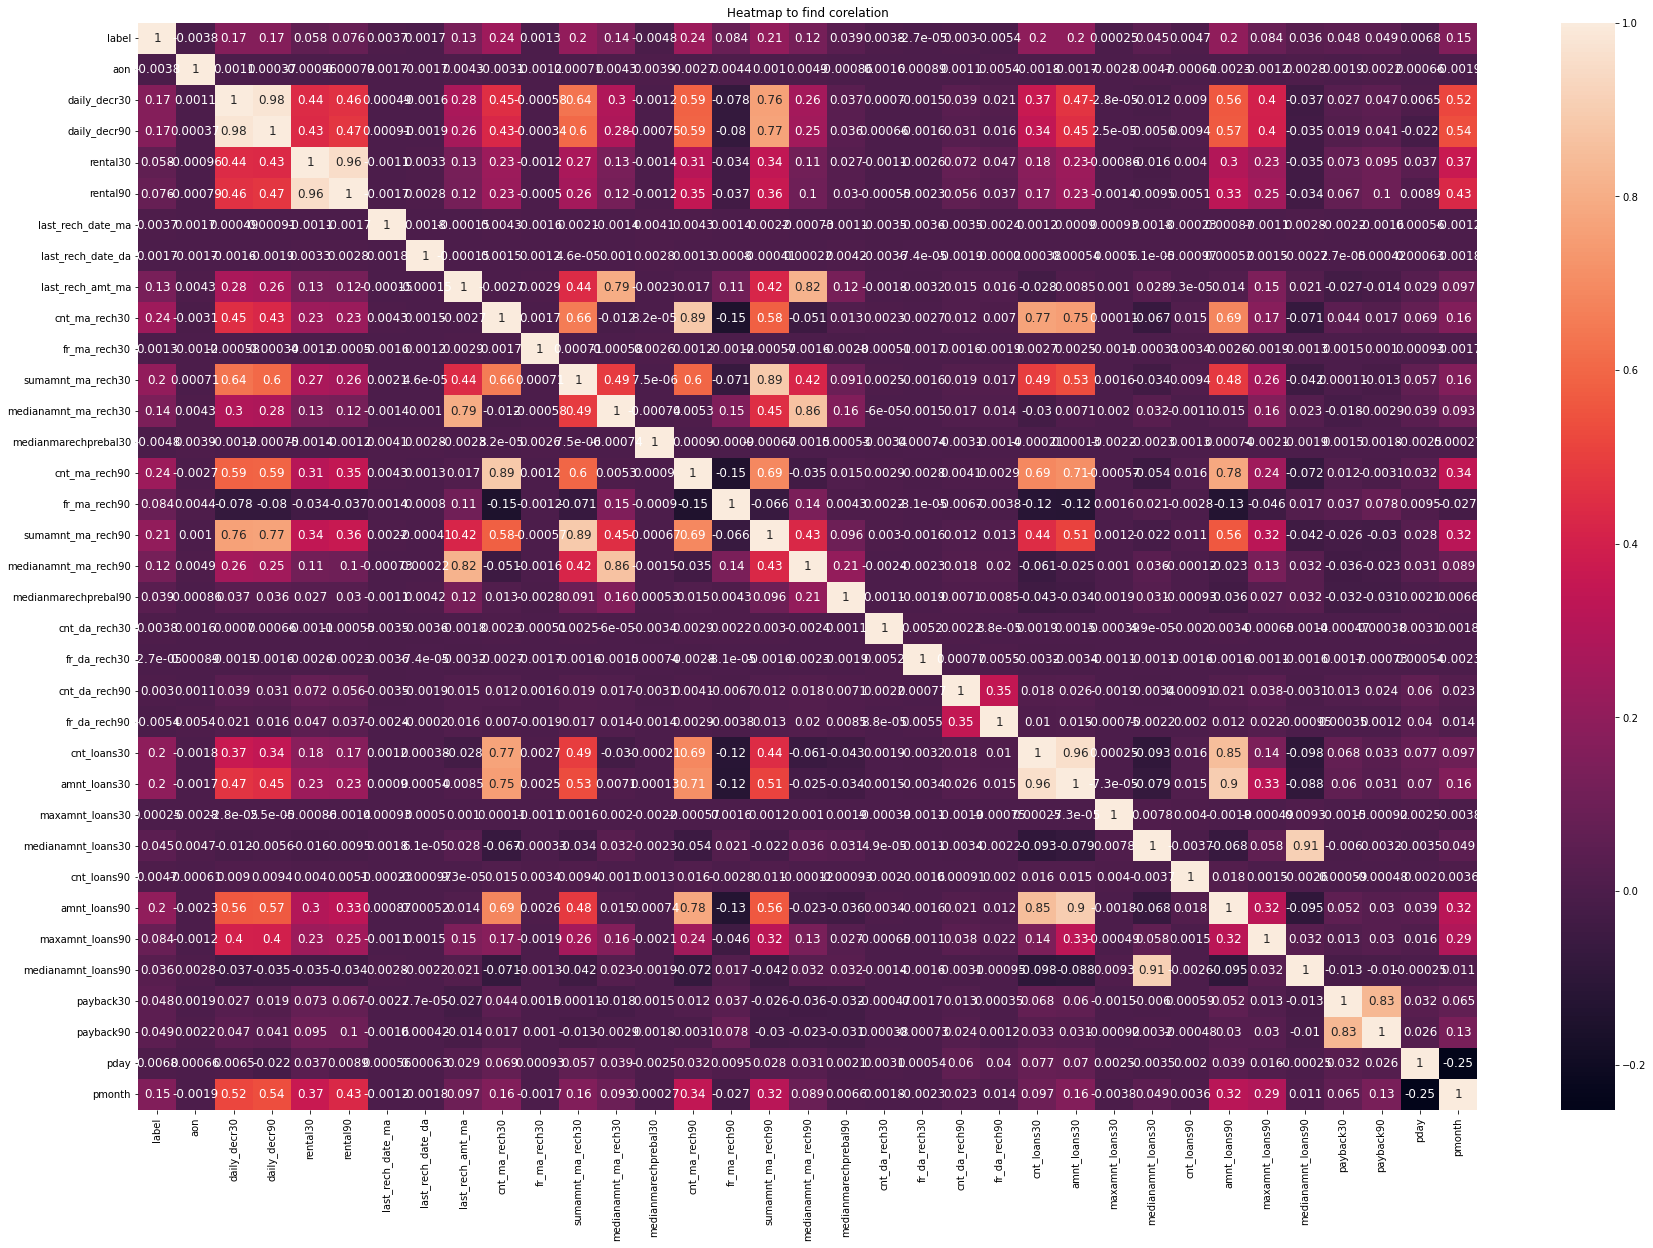

In [16]:
corr=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show

# EDA

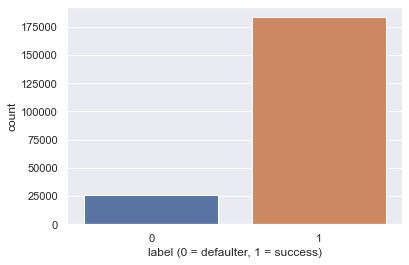

In [17]:
#Label
sns.set_theme()
sns.countplot(df['label'])
plt.xlabel('label (0 = defaulter, 1 = success)')
plt.show()

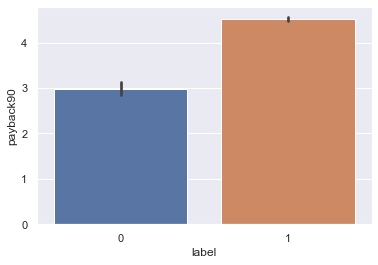

In [18]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['payback90'])
plt.show()

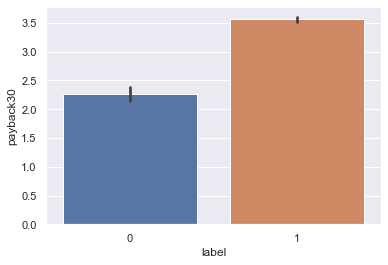

In [19]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['payback30'])
plt.show()

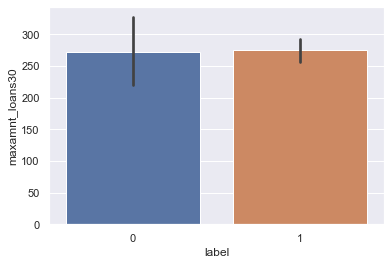

In [20]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['maxamnt_loans30'])
plt.show()

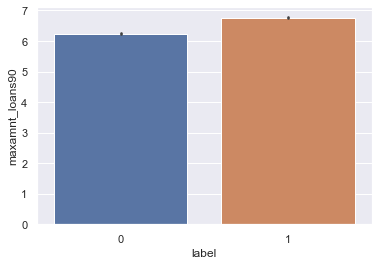

In [21]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['maxamnt_loans90'])
plt.show()

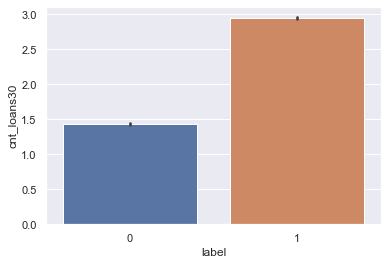

In [22]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['cnt_loans30'])
plt.show()

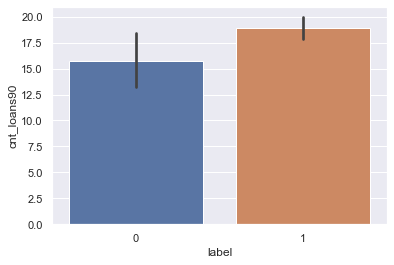

In [23]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['cnt_loans90'])
plt.show()

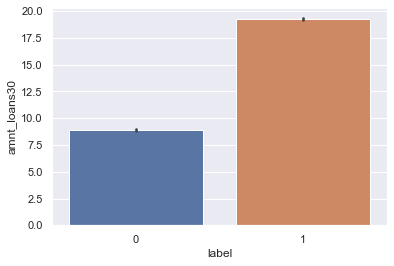

In [24]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['amnt_loans30'])
plt.show()

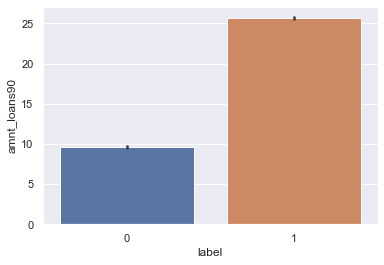

In [25]:
sns.set_theme()
sns.barplot(x = df['label'], y = df['amnt_loans90'])
plt.show()

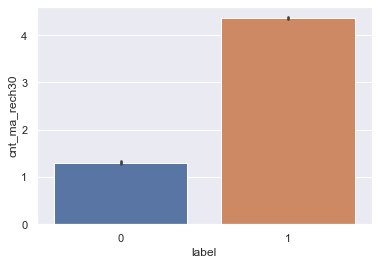

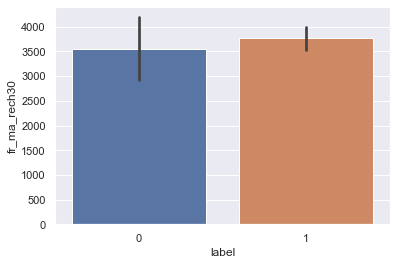

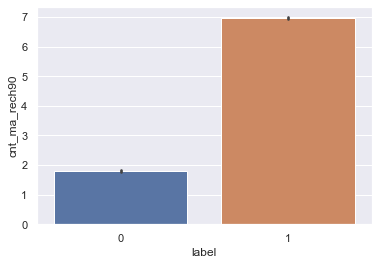

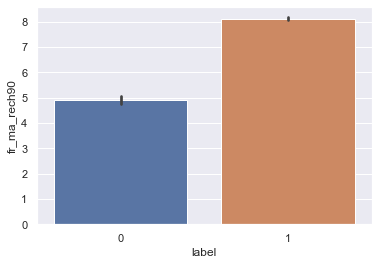

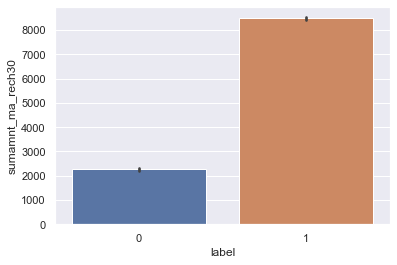

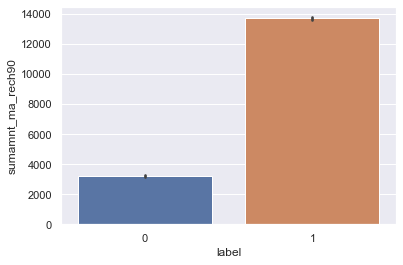

In [26]:
sns.barplot(x = df['label'], y = df['cnt_ma_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_ma_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['cnt_ma_rech90'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_ma_rech90'])
plt.show()
sns.barplot(x = df['label'], y = df['sumamnt_ma_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['sumamnt_ma_rech90'])
plt.show()

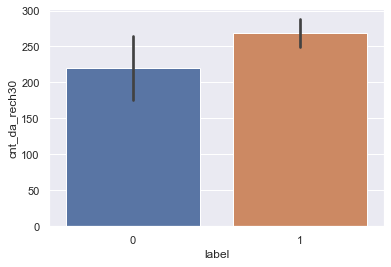

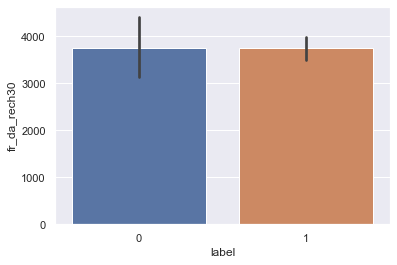

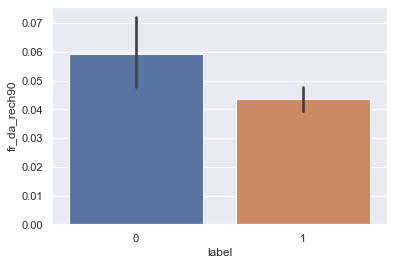

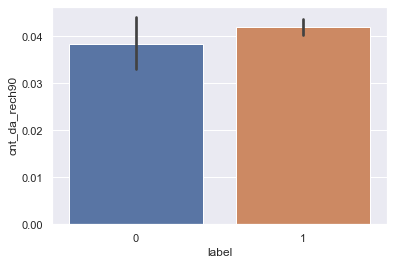

In [27]:
sns.barplot(x = df['label'], y = df['cnt_da_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_da_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_da_rech90'])
plt.show()
sns.barplot(x = df['label'], y = df['cnt_da_rech90'])
plt.show()

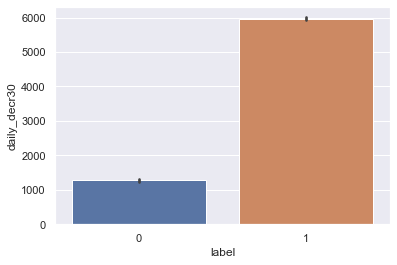

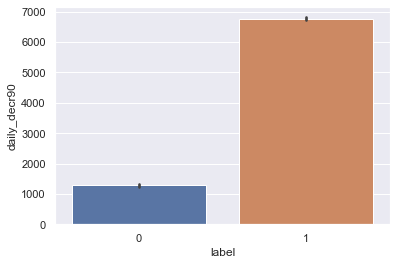

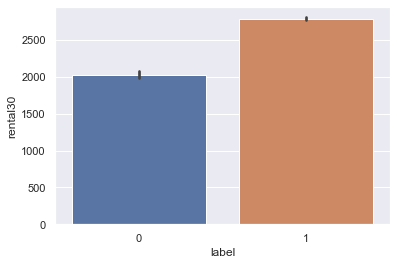

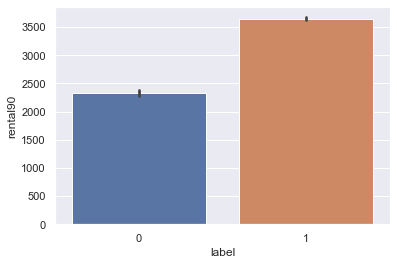

In [28]:
sns.barplot(x = df['label'], y= df['daily_decr30'])
plt.show()
sns.barplot(x = df['label'], y= df['daily_decr90'])
plt.show()
sns.barplot(x = df['label'], y = df['rental30'])
plt.show()
sns.barplot(x = df['label'], y = df['rental90'])
plt.show()

In [29]:
df['medianamnt_loans30'] = df['medianamnt_loans30'].replace(0,df['medianamnt_loans30'].mean())
df['medianamnt_loans90'] = df['medianamnt_loans90'].replace(0,df['medianamnt_loans90'].mean())
df['payback30'] = df['payback30'].replace(0,df['payback30'].mean())
df['payback90'] = df['payback90'].replace(0,df['payback90'].mean())
df['last_rech_date_da'] = df['last_rech_date_da'].replace(0,df['last_rech_date_da'].mean())
df['fr_ma_rech30'] = df['fr_ma_rech30'].replace(0,df['fr_ma_rech30'].median())
df['fr_ma_rech90'] = df['fr_ma_rech90'].replace(0,df['fr_ma_rech90'].median())
df['cnt_da_rech30'] = df['cnt_da_rech30'].replace(0,df['cnt_da_rech30'].mean())
df['cnt_da_rech90'] = df['cnt_da_rech90'].replace(0,df['cnt_da_rech90'].mean())
df['fr_da_rech30'] = df['fr_da_rech30'].replace(0,df['fr_da_rech30'].mean())
df['fr_da_rech90'] = df['fr_da_rech90'].replace(0,df['fr_da_rech90'].mean())

# Splitting X and Y 

In [30]:
x = df.drop(columns=['label'],axis = 1)
y = df['label']

# outliers


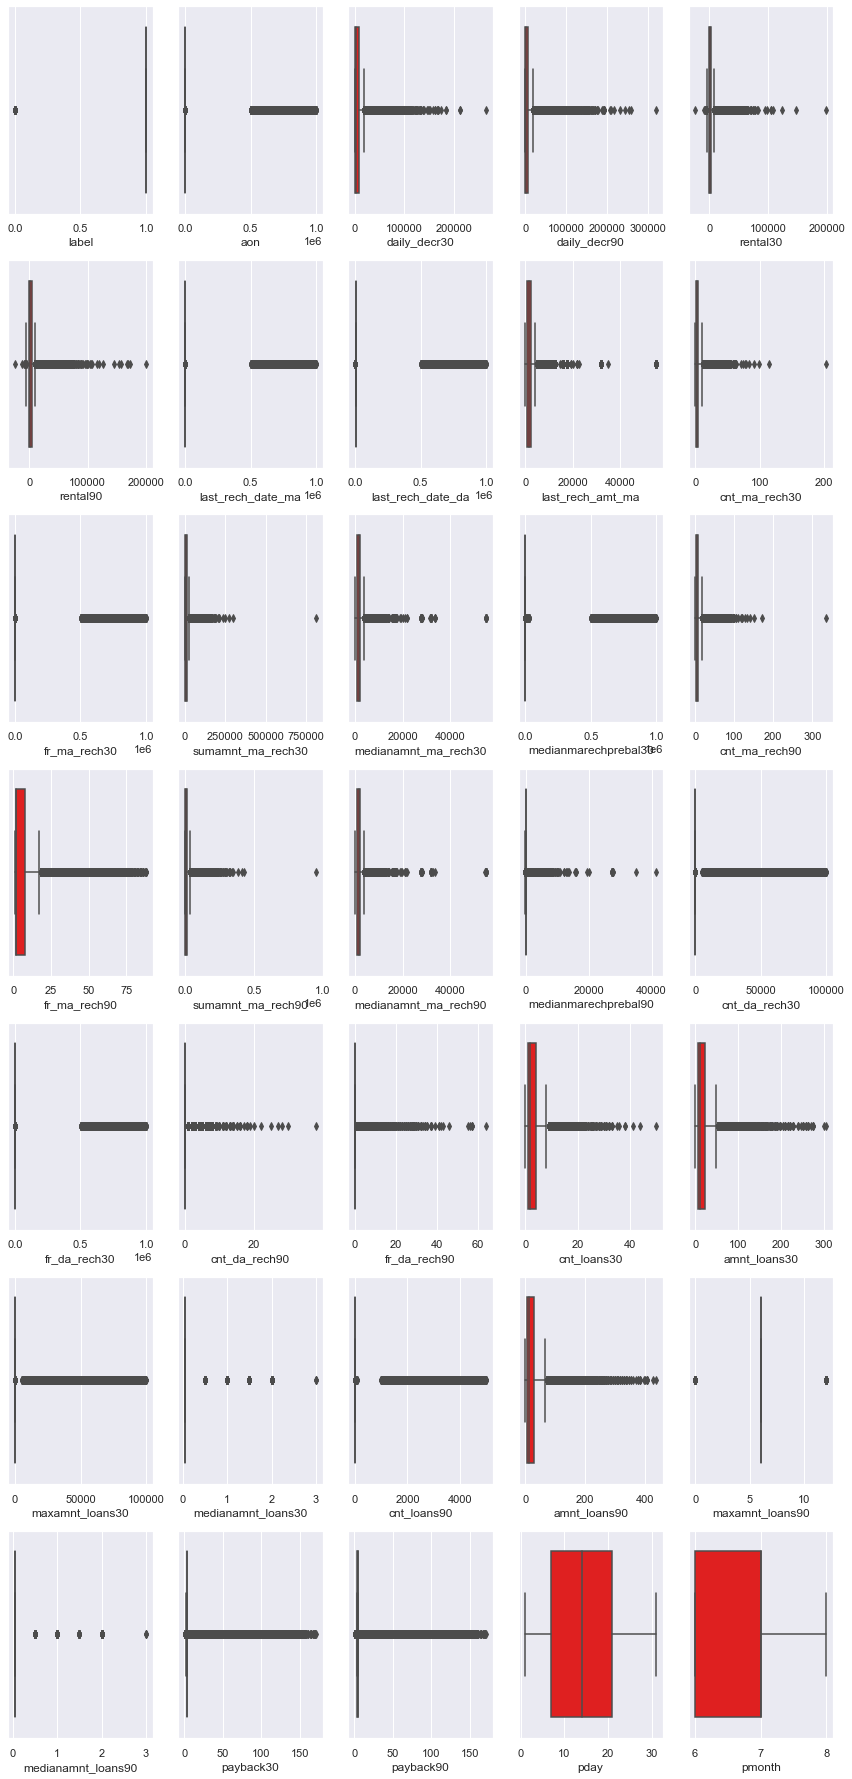

In [31]:
#Checking Outliers using boxplot
plt.figure(figsize=(12,35))

for i,col in zip(range(len(df.columns)),df.columns):
    plt.subplot(10,5,i+1)
    sns.boxplot(df[col],color='red',orient='v')
    plt.tight_layout()

# Zscore

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [33]:
df1=df[(z<3).all(axis=1)]

In [34]:
df.shape

(209593, 35)

In [35]:
df1.shape

(161544, 35)

In [36]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

22.924906843262896

# IQR

In [37]:
df2=df[df.columns[df.dtypes != 'object']].copy()

In [38]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.00)
    q3 = df[colm].quantile(0.985)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)

In [39]:
df = df.drop(indxdrop)

In [40]:
df.shape

(196407, 35)

In [41]:
loss=(209593-193412)/209593 * 100
loss

7.720200579217817

In [42]:
x.apply(np.sqrt)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,60.927850,39.230090,1.414214,4.582576,...,2.449490,0.23244,1.414214,3.464102,2.449490,0.214656,5.385165,5.385165,4.472136,2.645751
1,26.683328,110.099955,110.112443,60.755740,60.755740,4.472136,60.927850,76.072334,1.000000,1.414214,...,3.464102,0.23244,1.000000,3.464102,3.464102,0.214656,1.843591,2.078818,3.162278,2.828427
2,23.130067,37.389838,37.389838,30.002167,30.002167,1.732051,60.927850,39.230090,1.000000,1.414214,...,2.449490,0.23244,1.000000,2.449490,2.449490,0.214656,1.843591,2.078818,4.358899,2.828427
3,15.524175,4.607385,4.607385,12.626163,12.626163,6.403124,60.927850,30.773365,0.000000,1.414214,...,2.449490,0.23244,1.414214,3.464102,2.449490,0.214656,1.843591,2.078818,2.449490,2.449490
4,30.773365,12.272707,12.272707,33.149661,33.149661,2.000000,60.927850,48.052055,2.645751,1.414214,...,2.449490,0.23244,2.645751,6.480741,2.449490,0.214656,1.527525,1.527525,4.690416,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,20.099751,12.323649,12.323649,33.002879,33.002879,1.000000,60.927850,63.623895,1.732051,1.414214,...,2.449490,0.23244,1.414214,3.464102,2.449490,0.214656,1.000000,1.000000,4.123106,2.449490
209589,32.787193,6.077499,6.077499,41.573549,41.573549,2.000000,60.927850,27.802878,2.000000,1.000000,...,2.449490,0.23244,1.732051,4.242641,2.449490,0.214656,1.000000,1.000000,3.464102,2.449490
209590,31.827661,108.826062,109.107058,76.562589,94.303765,1.732051,60.927850,39.230090,2.236068,2.828427,...,3.464102,0.23244,2.449490,7.348469,3.464102,0.214656,2.000000,1.957890,5.385165,2.645751
209591,41.617304,111.750742,112.135498,20.293595,31.378018,1.414214,6.164414,27.802878,2.236068,2.000000,...,3.464102,0.23244,1.732051,4.898979,3.464102,0.214656,1.843591,3.240370,5.000000,2.645751


In [43]:
df.skew()

label                  -2.270543
aon                     0.947729
daily_decr30            2.934685
daily_decr90            3.085818
rental30                3.510168
rental90                3.604519
last_rech_date_ma       3.125599
last_rech_date_da      -6.442586
last_rech_amt_ma        2.302311
cnt_ma_rech30           2.211892
fr_ma_rech30            2.362670
sumamnt_ma_rech30       2.876007
medianamnt_ma_rech30    2.506589
medianmarechprebal30    5.024294
cnt_ma_rech90           2.430537
fr_ma_rech90            2.380998
sumamnt_ma_rech90       2.941702
medianamnt_ma_rech90    2.526443
medianmarechprebal90    4.810939
cnt_da_rech30          -9.735274
fr_da_rech30            0.000000
cnt_da_rech90           7.440984
fr_da_rech90            0.000000
cnt_loans30             2.412250
amnt_loans30            2.559521
maxamnt_loans30         1.443093
medianamnt_loans30      4.684263
cnt_loans90             2.680999
amnt_loans90            2.769851
maxamnt_loans90         1.698249
medianamnt

In [44]:
from sklearn.preprocessing import power_transform
df3 = power_transform(x, method ='yeo-johnson')

df3= pd.DataFrame(df3,columns=x.columns)

In [45]:
df3.skew()

aon                      1.654517
daily_decr30            -6.582717
daily_decr90            -7.080193
rental30                -1.022844
rental90                -0.962717
last_rech_date_ma       -5.362529
last_rech_date_da       -1.284108
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.312246
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.119058
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.297811
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     7.506286
cnt_da_rech30            0.793174
fr_da_rech30            -0.135017
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30         -1.680107
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90            -0.008988
maxamnt_loans90          0.364282
medianamnt_loa

In [46]:
x = x.drop(columns = ['fr_da_rech90','medianmarechprebal90','cnt_da_rech90','cnt_da_rech30','medianamnt_loans30','medianamnt_loans90',
                    'maxamnt_loans30','last_rech_date_da','last_rech_date_ma'],axis = 1)

In [47]:
df4 = pd.concat([x,y],axis = 1)
df4 = df4.dropna()
df4 = df4.reset_index(drop= True)
df4.shape

(209593, 26)

In [48]:
#Splitting features and label..
X = df4.drop(columns = ['label','amnt_loans90','cnt_loans30'],axis = 1)
Y = df4['label']

# StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

# Train test and split

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,Y, test_size = 0.25, random_state = i)

# ModelBuilding

# DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score,classification_report

In [55]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [56]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test, pred_DT))
print(confusion_matrix(y_test, pred_DT))
print(classification_report(y_test,pred_DT))

0.8810091795644955
[[ 3638  2932]
 [ 3303 42526]]
              precision    recall  f1-score   support

           0       0.52      0.55      0.54      6570
           1       0.94      0.93      0.93     45829

    accuracy                           0.88     52399
   macro avg       0.73      0.74      0.74     52399
weighted avg       0.88      0.88      0.88     52399



In [57]:
print(cross_val_score(DT,x,Y,cv=5).mean())

0.8825867360851121


In [58]:
roc_auc_score(y_test,pred_DT)

0.740828401443218

# RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RAN=RandomForestClassifier()
RAN.fit(x_train, y_train)
pred_RAN=RAN.predict(x_test)
print(accuracy_score(y_test, pred_RAN))
print(confusion_matrix(y_test, pred_RAN))
print(classification_report(y_test,pred_RAN))

0.9186816542300426
[[ 3401  3169]
 [ 1092 44737]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.61      6570
           1       0.93      0.98      0.95     45829

    accuracy                           0.92     52399
   macro avg       0.85      0.75      0.78     52399
weighted avg       0.91      0.92      0.91     52399



In [61]:
print(cross_val_score(RAN,x,Y,cv=5).mean())

0.919882820366517


In [62]:
roc_auc_score(y_test,pred_RAN)

0.7469141524148417

# LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log = LogisticRegression()
log.fit(x_train,y_train)
pred_log = log.predict(x_test)
print(accuracy_score(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test,pred_log))

0.8757228191377698
[[  127  6443]
 [   69 45760]]
              precision    recall  f1-score   support

           0       0.65      0.02      0.04      6570
           1       0.88      1.00      0.93     45829

    accuracy                           0.88     52399
   macro avg       0.76      0.51      0.49     52399
weighted avg       0.85      0.88      0.82     52399



In [65]:
print(cross_val_score(log,x,Y,cv=5).mean())

0.8763556008443762


In [66]:
roc_auc_score(y_test,pred_log)

0.5089123461502528

# AdaBoostClassifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ADA=AdaBoostClassifier()
ADA.fit(x_train, y_train)
pred_ADA=ADA.predict(x_test)
print(accuracy_score(y_test, pred_ADA))
print(confusion_matrix(y_test, pred_ADA))
print(classification_report(y_test,pred_ADA))

0.9080325960419092
[[ 2443  4127]
 [  692 45137]]
              precision    recall  f1-score   support

           0       0.78      0.37      0.50      6570
           1       0.92      0.98      0.95     45829

    accuracy                           0.91     52399
   macro avg       0.85      0.68      0.73     52399
weighted avg       0.90      0.91      0.89     52399



In [71]:
print(cross_val_score(ADA,x,Y,cv=5).mean())

0.909295637751941


In [72]:
roc_auc_score(y_test,pred_ADA)

0.6783710476503997

# ROC AUC curves

In [74]:
from sklearn.metrics import plot_roc_curve

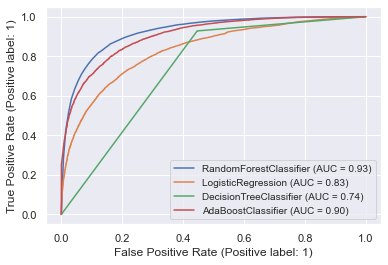

In [75]:
disp = plot_roc_curve(RAN,x_test,y_test)
mod = [log,DT,ADA]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

# HyperParameterTuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameter = {'n_estimators':[5,10,30],'max_depth': [1,6],'min_samples_leaf':[2,5,10],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}


In [82]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [83]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [5, 10, 30]},
             verbose=1)

In [84]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 5}

In [86]:
Best_mod2 = RandomForestClassifier(n_estimators = 30,criterion = 'entropy', max_depth= 6, max_features = 'sqrt',min_samples_leaf = 2, min_samples_split = 2)
Best_mod2.fit(x_train,y_train)
rfpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

90.17347659306475


In [87]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[ 1622,  4948],
       [  201, 45628]], dtype=int64)

# ModelSaving

In [88]:
import joblib
joblib.dump(Best_mod2,"BestModelMicroCredit.pkl")

['BestModelMicroCredit.pkl']